# Multi-class classification using CNN
This is a model designed to detect hand gestures using a Deep Convolutional Neural Network. This is a part of the CNN course provided by Mr. Laurence Moroney in Coursera.

## Step 1 - Extracting the data
First of all, we must extract the data from their folders.

In [3]:
import os

rock_dir = os.path.join('rps/rock')
paper_dir= os.path.join('rps/paper')
scissor_dir = os.path.join('rps/scissors')

print(f'Total Rock Images: {len(os.listdir(rock_dir))}')
print(f'Total Paper Images: {len(os.listdir(paper_dir))}')
print(f'Total Scissor Images: {len(os.listdir(scissor_dir))}')

print('Getting some image names . . .')

rock_files = os.listdir(rock_dir)
paper_files= os.listdir(paper_dir)
scissor_files= os.listdir(scissor_dir)

print(os.listdir(rock_dir)[:10])
print(os.listdir(paper_dir)[:10])
print(os.listdir(scissor_dir)[:10])

Total Rock Images: 840
Total Paper Images: 840
Total Scissor Images: 840
Getting some image names . . .
['rock04-119.png', 'rock02-070.png', 'rock02-114.png', 'rock07-k03-111.png', 'rock05ck01-039.png', 'rock01-012.png', 'rock07-k03-103.png', 'rock06ck02-061.png', 'rock04-001.png', 'rock03-119.png']
['paper03-022.png', 'paper04-037.png', 'paper03-114.png', 'paper04-071.png', 'paper03-106.png', 'paper06-071.png', 'paper06-097.png', 'paper05-024.png', 'paper02-041.png', 'paper02-086.png']
['testscissors03-039.png', 'testscissors03-062.png', 'scissors04-011.png', 'scissors01-015.png', 'testscissors02-061.png', 'scissors03-096.png', 'testscissors01-059.png', 'scissors01-033.png', 'scissors04-088.png', 'scissors02-020.png']


## Step 2 - Displaying some train images

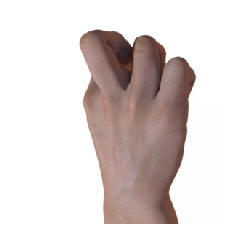

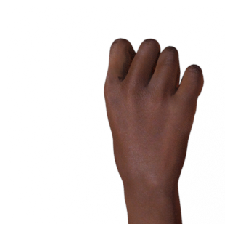

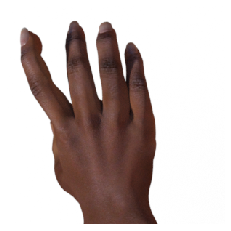

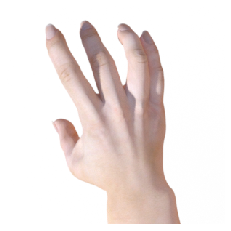

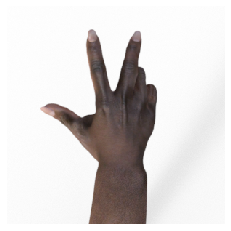

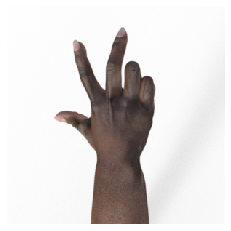

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissor_dir, fname) 
                for fname in scissor_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Step 3 - Getting things prepared for the model

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = os.path.join('rps/')
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR =os.path.join('rps_valid/')
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Step 4 -  Declaring, compiling and summarizing the model

In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

## Step 5 - Training the model using the data

In [9]:
history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Epoch 1/25
79/79 [==============================] - 72s 918ms/step - loss: 1.1629 - accuracy: 0.3841 - val_loss: 0.9824 - val_accuracy: 0.3763
Epoch 2/25
79/79 [==============================] - 63s 792ms/step - loss: 0.8451 - accuracy: 0.6016 - val_loss: 0.4683 - val_accuracy: 0.9839
Epoch 3/25
79/79 [==============================] - 63s 793ms/step - loss: 0.5345 - accuracy: 0.7770 - val_loss: 0.1618 - val_accuracy: 1.0000
Epoch 4/25
79/79 [==============================] - 62s 788ms/step - loss: 0.3583 - accuracy: 0.8655 - val_loss: 0.1360 - val_accuracy: 0.9435
Epoch 5/25
79/79 [==============================] - 61s 767ms/step - loss: 0.2645 - accuracy: 0.8972 - val_loss: 0.0702 - val_accuracy: 0.9839
Epoch 6/25
79/79 [==============================] - 62s 788ms/step - loss: 0.2138 - accuracy: 0.9266 - val_loss: 0.1228 - val_accuracy: 0.9543
Epoch 7/25
79/79 [==============================] - 63s 792ms/step - loss: 0.1942 - accuracy: 0.9337 - val_loss: 0.0285 - val_accuracy: 0.9866

## Step 6- Visualizing accuracy & loss

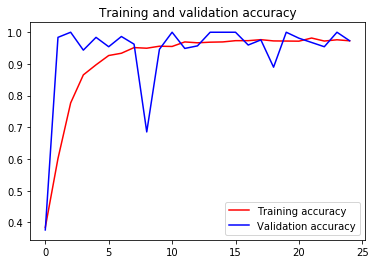

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [28]:
import numpy as np

test_dir = os.path.join('testset/')
print(os.listdir(test_dir))

for fname in os.listdir(test_dir):
    path = os.path.join('testset/'+fname)
    print(path)
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print('Filename: '+fname)
    print('Prediction Matrix':,)
    print(classes)
    
    predicted_class_indices=np.argmax(classes,axis=1)

#print(predicted_class_indices)


    labels = (train_generator.class_indices)
    labels = dict((v,k) for k, v in labels.items())
    predictions = [labels[k] for k in predicted_class_indices]
    for p in predictions:
        print('Prediction: '+p)

SyntaxError: invalid syntax (<ipython-input-28-7dc64c131753>, line 16)